# **7. UNCTADデータによる企業の国際立地選択の分析**



　国際収支の「経常勘定」と「金融勘定」のうち、金融勘定は、①外国直接投資、②国際証券投資、③その他投資（国際銀行融資）、④外貨準備の4項目から構成されます。企業の国際立地選択は、①外国直接投資に統計上、反映されます。

　外国直接投資は対外直接投資、対内直接投資の2つに分類されます。例えば日本企業が海外に生産工場を増設すれば、対外直接投資として計上され、外国企業が日本国内に立地選択すれば対内直接投資として集計されます。

　1964年に設立された国連貿易開発会議(United Nations Conference on Trade and Investment: UNCTAD)は、外国直接投資統計を世界の国々から収集し、統計を対外公表しています。データは同機関のHPからExcelで入手することも可能ですが、本例は、1970年から現在までの国連全加盟国のバルクデータを一括取得し、プログラミングすることでの、分析例を示します。

7.1　ライブラリの読み込み

　記述統計用ライブラリpandasと図表作成のためのmatplotlib、平均値の差の検定のためのscipyを使用します。

In [2]:
#[1]ライブラリの読み込み
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

7.2　データの読み込み

　UNCTADのデータセンターhttps://unctadstat.unctad.org/wds/ReportFolders/reportFolders.aspx?sCS_ChosenLang=en からバルクデータを入手し、このCSVファイルをgithubにアップロードします。その上で、1行目の記述によりこのデータを読み込み、pandasデータフレームとして保存します。3行目で最左列をインデックス化します。事前にURLにアップロードしておくことで、直接CSVファイルを読み込むよりも、迅速にデータが読み込めます。

In [3]:
#[2]データの読み込み
url = "https://github.com/nagamamo/data/blob/main/3_unctad_fdi_2023.csv?raw=true"#Git-hubからCSVデータの入手
data = pd.read_csv(url)#データフレームの作成
fdi = data.set_index("Year")#年をインデックスへ変更

7.3　データ確認

　読み込んだデータの冒頭5行を表示します。この作業を行うことで、バルクデータに収録されたデータや変数名を後々把握することができます。出力結果は、全世界、アフガニスタン、アルジェリアの順に、対外直接投資、対内直接投資のデータが1970年から収録されていることがわかります。

In [ ]:
#[3]データの確認
fdi.head()

7.3　個別国・地域の対外直接投資・対内直接投資データの抽出

　本例ではある特定の一カ国の対外直接投資（対内直接投資）のデータ抽出と記述統計、可視化の手順を示します。

　まず抽出する対象国・地域："Economy Label"==に7.3で確認した国・地域名を入力してください。

　続いて対内直接投資を分析するときは、"Direction"==1、対内直接投資の場合は"Direction"==2に変更してください。

　"Mode"==8の場合は、各年のフローの直接投資額（対GDP比）が絞り込まれます。



In [ ]:
#[4]国・地域データの抽出
country=fdi[(fdi["Economy Label"] == "Japan")&(fdi["Direction"] == 2)&(fdi["Mode"] == 8)]
country.head()

7.4　可視化

　次に抽出したデータを可視化します。下記の日本の例では、自動車メーカーの海外生産展開が増加した1990年代以降、対外直接投資(対GDP比）が急速に増大していることがわかります。

Text(0, 0.5, 'Percent')

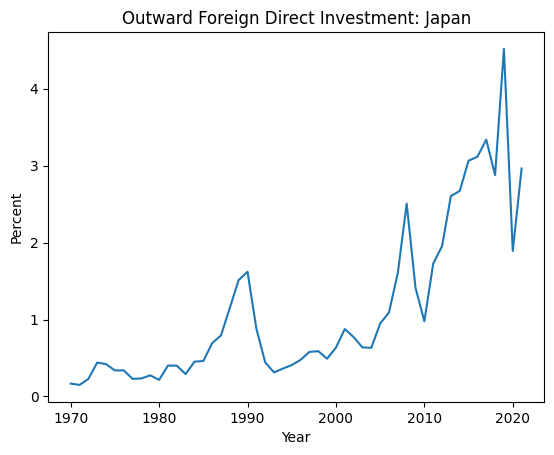

In [6]:
#[5]可視化
plt.plot(country['Percentage of Gross Domestic Product'])
plt.title("Outward Foreign Direct Investment: Japan")
plt.xlabel("Year")
plt.ylabel("Percent")

7.5　記述統計の算出

　抽出したデータの最近50年間の記述統計を算出します。

In [ ]:
country['Percentage of Gross Domestic Product'].describe()

7.6　Pandasデータフレームの時系列データの分割

　20世紀の最後の20年間と、21世紀の20年間で、外国直接投資（対GDP比）が統計的に有意に、その平均値が異なるのかを検証します。まず、Pandasデータフレームのインデックスを用いて、1980～2000年と2001～2021年の2つにデータを分割します。

In [ ]:
df1=country['Percentage of Gross Domestic Product'].loc['2001':'2021']
df2=country['Percentage of Gross Domestic Product'].loc['1980':'2000']
df2.head()

7.7  平均値のt検定

　最後に2分割したデータの平均値の差の検定を行います。

In [ ]:
stats.ttest_rel(df1, df2)